# Desafio Neoway - Conclusão

<p><b>Cientista de Dados:</b> Cassiano J. Pereira</p>
<p><b>Data:</b> 22/11/2021</p>

## Bibliotecas Utilizadas

In [123]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

In [124]:
file1 = 'individuos_conexoes_previstos.csv'
file2 = "conexoes_espec.csv"

## Carregando as Tabela Conexões Indivíduos com as Predições

In [125]:
df_individuos_conexoes_previstos = pd.read_csv(file1, sep=';')
df_individuos_conexoes_previstos

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos,cluster
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.589462,0,...,0,1,0,0,1,0,5,7,240421249.0,0
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.708465,0,...,0,1,0,0,0,1,5,4,240181537.0,0
2,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.638842,1,...,0,1,0,0,0,1,7,1,247515432.0,0
3,35.0,0.0,0.0,1.0,55.0,1.0,1.0,1.0,0.709608,0,...,1,0,0,1,0,0,4,8,264397858.0,4
4,50.0,1.0,1.0,0.0,42.0,0.0,1.0,0.0,0.465209,0,...,0,0,0,1,0,0,7,9,20121880.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,30.0,1.0,0.0,1.0,32.0,0.0,1.0,0.0,0.748095,0,...,0,1,0,0,1,0,9,7,89433224.0,3
999995,30.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,0.744036,0,...,1,0,0,1,0,0,9,2,72508552.0,3
999996,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,0.359774,1,...,0,1,0,0,0,1,5,2,187746696.0,2
999997,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,0.470589,1,...,0,1,0,0,0,1,5,6,187752840.0,2


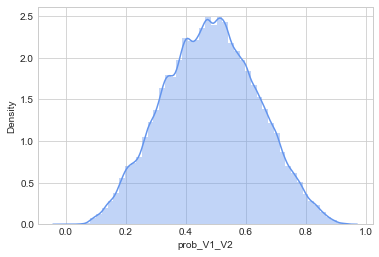

In [164]:
sbn.distplot(df_individuos_conexoes_previstos['prob_V1_V2'], color='cornflowerblue');

## Criando classes para os  níveis da taxa de contágio

In [165]:
labels = ['Baixo', 'Médio', 'Alto']
df_individuos_conexoes_previstos['nivel'] = pd.qcut(df_individuos_conexoes_previstos['prob_V1_V2'], 3, labels=labels)

In [166]:
niveis_contagio_atual = df_individuos_conexoes_previstos.groupby('nivel').prob_V1_V2.sum();

In [167]:
df_conexoes = pd.read_csv(file2, sep=';')

labels = ['Baixo', 'Médio', 'Alto']
df_conexoes['nivel'] = pd.qcut(df_conexoes['prob_V1_V2'], 3, labels=labels)
niveis_contagio_anterior = df_conexoes.groupby('nivel').prob_V1_V2.sum();

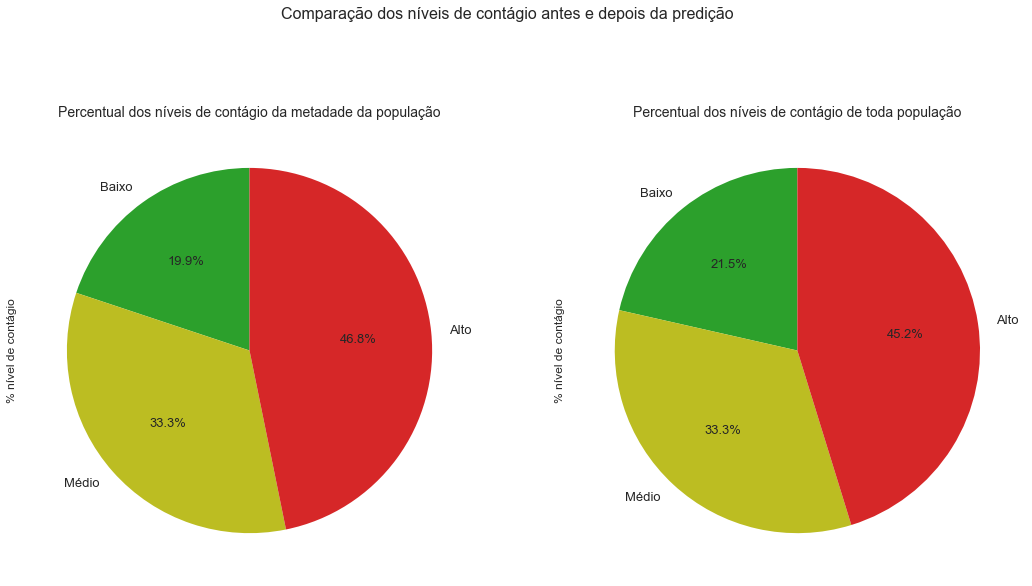

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), sharex=True)

colours = {'Baixo': 'C2',
           'Médio': 'C8',
           'Alto': 'C3'}

niveis_contagio_anterior.plot.pie(autopct='%1.1f%%', colors=[colours[key] for key in labels],
        shadow=False, startangle=90, fontsize=13, ax=ax[0]);
ax[0].set_title('Percentual dos níveis de contágio da metadade da população', fontsize=14);
ax[0].set_ylabel('% nível de contágio', fontsize=12);

niveis_contagio_atual.plot.pie(autopct='%1.1f%%', colors=[colours[key] for key in labels],
        shadow=False, startangle=90, fontsize=13, ax=ax[1]);
ax[1].set_ylabel('% nível de contágio', fontsize=12);
ax[1].set_title('Percentual dos níveis de contágio de toda população', fontsize=14);
plt.suptitle('Comparação dos níveis de contágio antes e depois da predição', fontsize=16);

In [313]:
round(df_conexoes['prob_V1_V2'].mean()*100, 2), round(df_individuos_conexoes_previstos['prob_V1_V2'].mean()*100, 2)

(48.52, 48.35)

Depois da predição das taxas de contágio, pode-se obversar um leve aumento do percentual do nível de contágio baixo, assim como uma pequena redução no nível de contágio alto. O nível de contágio médio permaneceu o mesmo e a média das taxas de contágio, tanto antes, como depois da predição, também permaneceram praticamente as mesmas, 48%.

## Analisando algumas informações para tomada de decisão

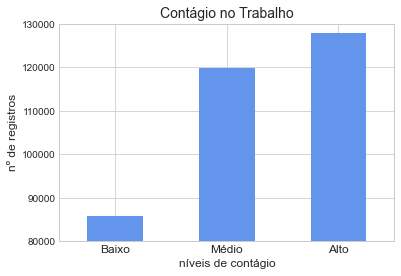

In [345]:
nivel_trabalho = df_individuos_conexoes_previstos.groupby('nivel').grau_trabalho.sum();
nivel_trabalho.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(80000, 130000)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.ylabel('nº de registros', fontsize=12)
plt.title('Contágio no Trabalho', fontsize=14);

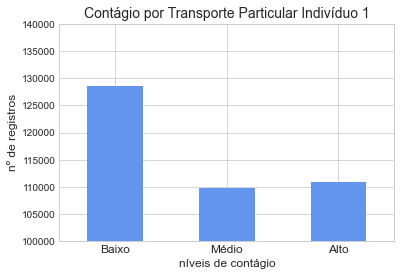

In [344]:
nivel_transporte_particular = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_particular.sum();
nivel_transporte_particular.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(100000, 140000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Transporte Particular Indivíduo 1', fontsize=14);

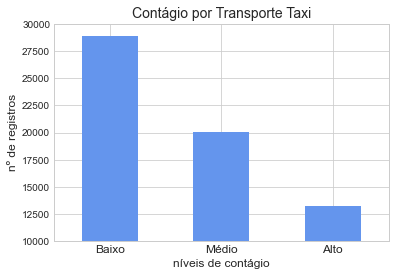

In [343]:
nivel_transporte_taxi = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_taxi.sum();
nivel_transporte_taxi.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(10000, 30000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Transporte Taxi', fontsize=14);

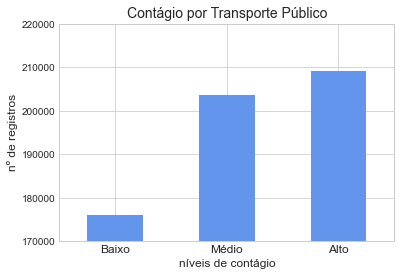

In [341]:
nivel_transporte_publico = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_publico.sum();
nivel_transporte_publico.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(170000, 220000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Transporte Público', fontsize=14);

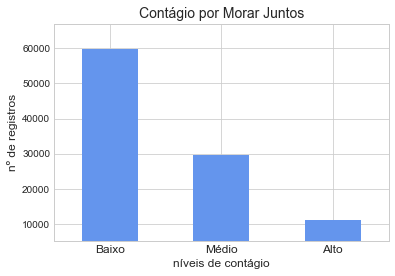

In [340]:
nivel_mora_junto = df_individuos_conexoes_previstos.groupby('nivel').proximidade_mora_junto.sum();
nivel_mora_junto.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(5000, 67000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Morar Juntos', fontsize=14);

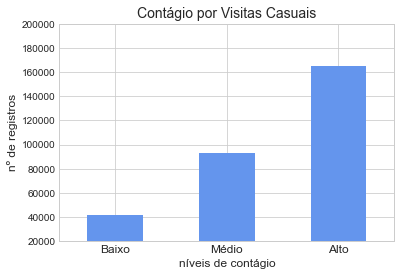

In [339]:
nivel_visita_casual = df_individuos_conexoes_previstos.groupby('nivel').proximidade_visita_casual.sum();
nivel_visita_casual.plot.bar(ylabel='nº de casos', color='cornflowerblue');
plt.ylim(20000, 200000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Visitas Casuais', fontsize=14);

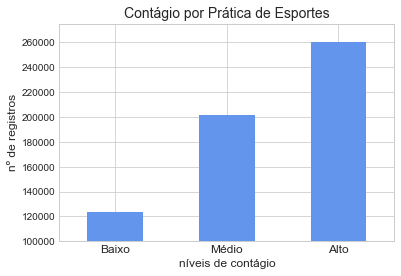

In [338]:
nivel_esporte = df_individuos_conexoes_previstos.groupby('nivel').pratica_esportes1.sum();
nivel_esporte.plot.bar(ylabel='nº de registros', color='cornflowerblue');
plt.ylim(100000, 275000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por Prática de Esportes', fontsize=14);

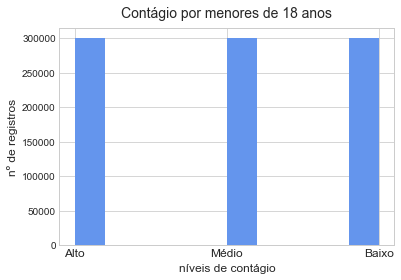

In [346]:
df_individuos_conexoes_previstos[(df_individuos_conexoes_previstos.IMC1_cut > 0) & (df_individuos_conexoes_previstos.IMC1_cut < 100)].nivel.hist(color='cornflowerblue')
# plt.ylim(20000, 45000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por menores de 18 anos', y=1.02, fontsize=14);

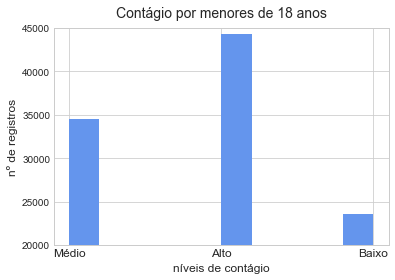

In [315]:
df_individuos_conexoes_previstos[(df_individuos_conexoes_previstos.idade1 > 0) & (df_individuos_conexoes_previstos.idade1 < 18)].nivel.hist(color='cornflowerblue')
plt.ylim(20000, 45000)
plt.ylabel('nº de registros', fontsize=12)
plt.xlabel('níveis de contágio', fontsize=12)
plt.xticks(ha='center', rotation=0, fontsize=12)
plt.title('Contágio por menores de 18 anos', y=1.02, fontsize=14);

-----------

# Políticas de Saúde

### Baseado nos dados previstos e analisados, foi concluído:

* Maior contágio entre as pessoas que trabalham;
* Maior contágio entre as pessoas que utilizam o transporte público;
* Maior contágio em visitas casuais;
* Maior taxa de transmissão pelas pessoas menores de 18 anos;
* Maior taxa de transmissão pelas que praticam atividades físicas;
* Foi inconclusiva a relevância das informações de IMC;

### Sugestão de políticas de saúde:

* Distanciamento social, evitar aglomerações, evitar visitas casuais;
* Não permitir lotação total nos espaços públicos (transporte público, escritórios, lojas, restaurantes, academias, etc);
* Incentivar trabalho remoto para as área que permitem esse formato;
* Aulas remotas, visto que a taxa de transmissão é mais alta na população menor de 18 anos;
* Descobrir os modos de transmissão deste vírus e orientar a população as utilizar itens de proteção para reduzir a transmissão, principalmente em espaços públicos;

----------